In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_excel("Load_Data_in_kW.xlsx",header=None)
data.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [4]:
z = np.abs(stats.zscore(data))
print(z)

[[0.04910416]
 [0.08229029]
 [0.08782131]
 ...
 [0.09743692]
 [0.07253822]
 [0.03181432]]


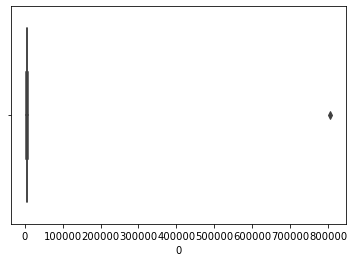

In [5]:
sns.boxplot(x=data[0])

In [6]:
df = data
q = df[0].quantile(0.99)
df[df[0] < q]
q_low = df[0].quantile(0.01)
q_hi  = df[0].quantile(0.99)

df_filtered = df[(df[0] < q_hi) & (df[0] > q_low)]
df_filtered.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [7]:
print(len(data))
print(len(df_filtered))
if(len(data) == len(df_filtered)):
    print('No outliners')

2184
2140


In [8]:
data = df_filtered
data_n = data.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,0
0,0.372950
1,0.254941
2,0.235273
3,0.273574
4,0.299162


In [9]:
train_data,test_data = train_test_split(data_n,test_size=0.1)
print(len(train_data))
train_data.head()

1926


,0
1313,0.260764
768,0.372271
58,0.528968
1802,0.287258
263,0.359072


In [10]:
dtx = []
dty = []
for i in range(len(train_data.iloc[:,0])-24):
    dtx.append(train_data.iloc[i,0])
    dty.append(train_data.iloc[i+24,0])

In [12]:
from sympy import * 
#step-1
m0=1
c0=-1
gaama=0.9
epochs=20
learningrate=0.1
vm=vc=0

#step-2
x=Symbol('x')
y=Symbol('y')
m=Symbol('m')
c=Symbol('c')
E=(0.5)*(y-(m*x)-c)**2
Em=E.diff(m)
Ec=E.diff(c)
err=[]
for itr in range(0,epochs):  #step-7
 er=0
 for s in range(0,len(dtx)): #step-6
  #step-3
  er+=((dty[s]-(m0*dtx[s])-c0))**2
  dfEm=Em.subs(m,m0+gaama*vm)
  dfEm=dfEm.subs(c,c0+gaama*vc) 
  dfEm=dfEm.subs(x,dtx[s]) 
  dfEm=dfEm.subs(y,dty[s])
  dfEm=round(dfEm,2)
  dfEc=Ec.subs(m,m0+gaama*vm)
  dfEc=dfEc.subs(c,c0+gaama*vc) 
  dfEc=dfEc.subs(x,dtx[s]) 
  dfEc=dfEc.subs(y,dty[s])
  dfEc=round(dfEc,2)
  #step-4
  vm=(gaama*vm)-(learningrate*dfEm)
  vc=(gaama*vc)-(learningrate*dfEc)
 
  #step-5
  m0=m0+vm
  c0=c0+vc
  m0=round(m0,2)
  c0=round(c0,2)
  er = (1/(2*len(dtx)))*(er)
  err.append(er)
#step-7
print('Minimum value is at m=',m0)
print('Minimum value is at c=',c0)

Minimum value is at m= 0.22
Minimum value is at c= 0.56


In [13]:
train_data_pred = [i for i in dtx]
for k in range(len(dtx)):
    train_data_pred[k]=(m0*dtx[k] + c0)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dty,train_data_pred)
mse

0.08341254313544438

Text(0.5, 1.0, 'predicted vs actual(Data)')

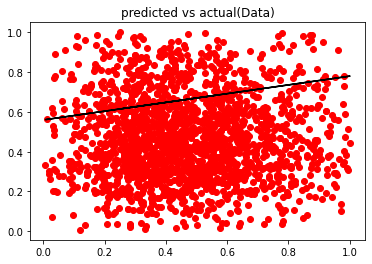

In [14]:
plt.plot(np.array(dtx),np.array(train_data_pred),'black')
plt.scatter(np.array(dtx),np.array(dty),color='red')
plt.title('predicted vs actual(Data)')

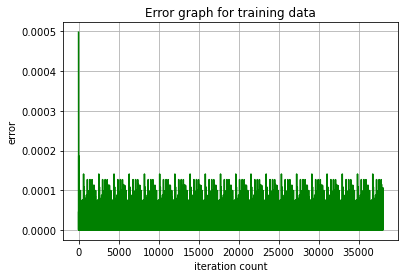

In [15]:
iters = np.arange(epochs*len(dtx))
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

In [16]:
dtx = []
dty = []
for i in range(len(test_data.iloc[:,0])-24):
    dtx.append(test_data.iloc[i,0])
    dty.append(test_data.iloc[i+24,0])
test_data_pred = [i for i in dtx]
for k in range(len(dtx)):
    test_data_pred[k]=(m0*dtx[k] + c0)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dty,test_data_pred)
mse

0.08185938663327906

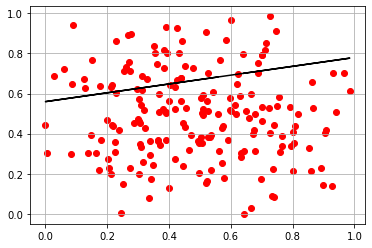

In [17]:
plt.scatter(dtx,dty,color='red')
plt.plot(dtx,test_data_pred,'black')
plt.grid()

In [18]:
x_max = y_max= 8841.669480
x_min = y_min = 3377.919600
x =x1 = float(input("enter load of previous hour :"))
x = (x - x_min)/(x_max - x_min)
y = m0*x + c0
y = y*(y_max - y_min) + y_min
print(f"load at hour based on its previous day is : {y}")

enter load of previous hour :5160
load at hour based on its previous day is : 6827.27730638672
